In [1]:
import pandas as pd

In [2]:
df_original = pd.read_csv("cust_seg.csv")

C:\Users\rayng\AppData\Local\Temp\ipykernel_2052\2784930815.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("cust_seg.csv")


In [3]:
df = pd.read_csv("cust_seg_transformed.csv", index_col="Unnamed: 0")

In [4]:
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2015-02-28,1183296,N,ES,H,27.0,2013-09-25,0.0,22.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
999996,2015-02-28,1183295,N,ES,H,56.0,2013-09-25,0.0,22.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
999997,2015-02-28,1183294,N,ES,V,39.0,2013-09-25,0.0,22.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
999998,2015-02-28,1183293,N,ES,V,36.0,2013-09-25,0.0,22.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1


In [5]:
df["pais_residencia"].value_counts()

ES    993046
FR       546
AR       542
DE       487
GB       480
       ...  
TN         2
LB         2
GE         2
BZ         2
AL         1
Name: pais_residencia, Length: 113, dtype: int64

The above code shows that the majority of customers are from Spain (ES), while the next five countries are from France (FR), Andorra (AR), Germany (DE), and UK (GB). We could thus make a separate customer segment for **foreign customers** (outside of Spain).

In [6]:
df["nomprov"].value_counts()

MADRID                    377865
BARCELONA                  87372
VALENCIA                   46394
SEVILLA                    43922
CORUÑA, A                  27545
MALAGA                     26798
MURCIA                     24782
ZARAGOZA                   24621
ALICANTE                   20323
CADIZ                      20292
ASTURIAS                   18399
PONTEVEDRA                 17482
VALLADOLID                 16657
PALMAS, LAS                15976
BIZKAIA                    15597
GRANADA                    12930
TOLEDO                     12131
BADAJOZ                    11909
CANTABRIA                  11264
SALAMANCA                  10650
CORDOBA                     9829
BALEARS, ILLES              8361
CACERES                     8347
HUELVA                      7923
CIUDAD REAL                 7782
ALBACETE                    7294
CASTELLON                   6711
NAVARRA                     6584
BURGOS                      6403
TARRAGONA                   6120
RIOJA, LA 

<AxesSubplot:ylabel='nomprov'>

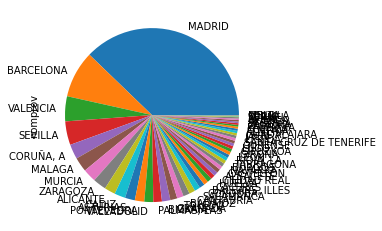

In [7]:
df["nomprov"].value_counts().plot.pie()

The above pie chart also shows that over half the customers reside in the provinces of Madrid, Barcelona, and Valencia.

In [8]:
for col in df:
    print(col + ":", df[col].unique())

fecha_dato: ['2015-01-28' '2015-02-28']
ncodpers: [1375586 1050611 1050612 ... 1149999 1150908 1183305]
ind_empleado: ['N' 'A' 'B' 'F' 'S']
pais_residencia: ['ES' 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AD' 'CZ' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL'
 'RU' 'GT' 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'ET' 'CM' 'SA'
 'CI' 'QA' 'LU' 'PA' 'BA' 'BO' 'AU' 'BY' 'KE' 'SG' 'HR' 'MD' 'SK' 'TR'
 'AO' 'CU' 'GQ' 'EG' 'ZA' 'DK' 'UY' 'GE' 'TH' 'DZ' 'LB' 'JP' 'NG' 'PK'
 'TN' 'TG' 'KR' 'GH' 'RS' 'VN' 'PH' 'KW' 'NZ' 'MM' 'KH' 'GI' 'SL' 'GN'
 'GW' 'OM' 'CG' 'LV' 'LT' 'ML' 'MK' 'HU' 'IS' 'LY' 'CF' 'GM' 'KZ' 'CD'
 'BZ']
sexo: ['H' 'V']
age: [ 35.  23.  22.  24.  65.  28.  25.  26.  53.  27.  32.  37.  31.  39.
  63.  33.  55.  42.  58.  38.  50.  30.  45.  44.  36.  29.  60.  57.
  67.  47.  43.  34.  48.  46.  54.  84.  15.  12.   8.   6.  83.  40.
  77.  69.  52.  59.  10.   9.  49

In [9]:
df["ind_nuevo"].value_counts()

0.0    999516
1.0       484
Name: ind_nuevo, dtype: int64

This shows that the vast majority of customers have been registered more than 6 months ago.

<AxesSubplot:ylabel='Frequency'>

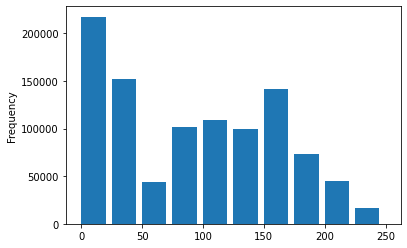

In [10]:
df["antiguedad"].plot.hist(bins=[25*i for i in range(11)], width=20)

In [11]:
df["antiguedad"].mean()

97.136474

This is a histogram plotting the customer seniority in months. There is a slowly decreasing distribution, with mean of 97 months. However, there is a large portion of customers who have **seniority below 50 months**, so we may make a segment for that.

In [12]:
from datetime import datetime
def get_year(date_str):
    date = datetime.strptime(date_str, "%Y-%m-%d")
    return date.year

def get_month(date_str):
    date = datetime.strptime(date_str, "%Y-%m-%d")
    return date.month

def get_day(date_str):
    date = datetime.strptime(date_str, "%Y-%m-%d")
    return date.day

In [13]:
df["fecha_alta_ano"] = df["fecha_alta"].map(get_year)
df["fecha_alta_mes"] = df["fecha_alta"].map(get_month)
df["fecha_alta_dia"] = df["fecha_alta"].map(get_day)

In [14]:
df[["fecha_alta", "fecha_alta_ano", "fecha_alta_mes", "fecha_alta_dia"]]

,fecha_alta,fecha_alta_ano,fecha_alta_mes,fecha_alta_dia
0,2015-01-12,2015,1,12
1,2012-08-10,2012,8,10
2,2012-08-10,2012,8,10
3,2012-08-10,2012,8,10
4,2012-08-10,2012,8,10
...,...,...,...,...
999995,2013-09-25,2013,9,25
999996,2013-09-25,2013,9,25
999997,2013-09-25,2013,9,25
999998,2013-09-25,2013,9,25


How many customers are there for each month of "fecha_alta" (when the customer became the first holder of a contract)? We will create a table and make a plot.

In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df[["fecha_alta_ano", "fecha_alta_mes"]].value_counts().sort_index())

fecha_alta_ano  fecha_alta_mes
1995            1                   146
                2                   117
                3                   177
                4                   223
                5                   426
                6                   747
                7                   764
                8                   366
                9                   994
                10                 1941
                11                  842
                12                 1254
1996            1                  1216
                2                   687
                3                   953
                4                  1796
                5                   719
                6                  1013
                7                  1120
                8                   463
                9                   580
                10                 1628
                11                 1135
                12                 1617
1997     

<AxesSubplot:xlabel='fecha_alta_ano,fecha_alta_mes'>

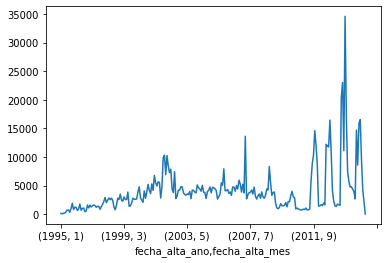

In [16]:
df[["fecha_alta_ano", "fecha_alta_mes"]].value_counts().sort_index().plot()

<AxesSubplot:xlabel='fecha_alta_ano'>

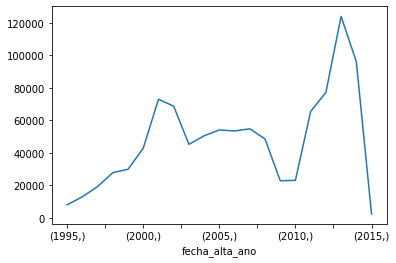

In [17]:
df[["fecha_alta_ano"]].value_counts().sort_index().plot()

These plots show the trends of how many customers became the first holder of a contract. The numbers are particularly high during the periods 2001-02 and between 2011-14. It may make sense to make a **segment for "new customers"**, i.e. those who registered a contract within the past year or two years.

How does the household income of customers vary by province, etc.?

In [18]:
mean_renta_by_prov = df[["nomprov", "renta"]].groupby("nomprov").mean()

In [19]:
mean_renta_by_prov

,renta
nomprov,
ALAVA,139646.150940
ALBACETE,89407.172471
ALICANTE,100694.363557
ALMERIA,96181.834861
ASTURIAS,109660.503317
AVILA,88069.215570
BADAJOZ,84333.077351
"BALEARS, ILLES",161349.899076
BARCELONA,162603.281551


In [20]:
mean_renta_by_prov.sort_values(by="renta", ascending=False)

,renta
nomprov,
MADRID,176555.571033
CEUTA,174613.212999
BARCELONA,162603.281551
"BALEARS, ILLES",161349.899076
MELILLA,143743.445989
GIRONA,142086.635431
BIZKAIA,139648.469084
ALAVA,139646.150940
GIPUZKOA,139635.806334


<AxesSubplot:xlabel='nomprov'>

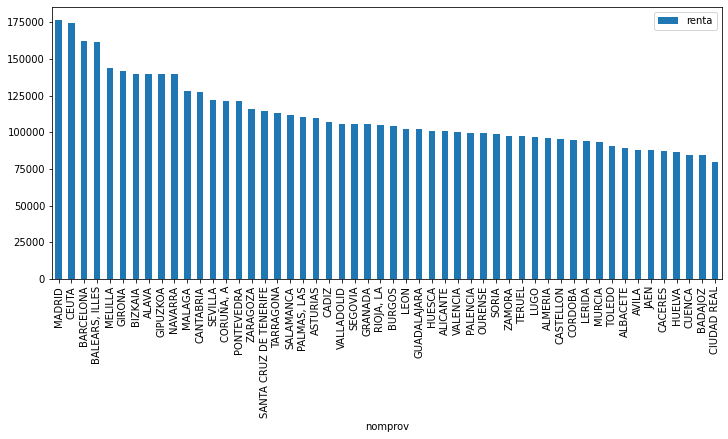

In [21]:
mean_renta_by_prov.sort_values(by="renta", ascending=False).plot.bar(figsize=(12,5))

Madrid has the highest average renta in the list, and also as shown before, it has the highest share of customers in the list. We could target the **Madrid-based customers** as a segment and the rest as another segment.

In [22]:
df["ind_actividad_cliente"].value_counts()

1.0    569661
0.0    430339
Name: ind_actividad_cliente, dtype: int64

In [27]:
df[list(filter(lambda string: string[:4] == "ind_" and string[-4:] == "ult1", df.columns))].corr()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
ind_ahor_fin_ult1,1.000000,-0.000083,-0.003762,-0.000324,-0.000156,-0.001564,-0.001330,0.007790,0.004430,-0.000619,...,0.001689,0.007171,-0.000910,0.007578,0.000697,0.005423,0.013962,-0.000470,-0.000836,0.003143
ind_aval_fin_ult1,-0.000083,1.000000,-0.002674,-0.000152,0.011944,-0.000734,-0.000624,0.000671,0.009405,-0.000290,...,-0.000627,0.001915,-0.000427,0.012449,0.011230,0.011909,-0.000503,0.012588,0.011815,0.012694
ind_cco_fin_ult1,-0.003762,-0.002674,1.000000,-0.000193,-0.503145,-0.203290,-0.052445,-0.103132,-0.135400,-0.012420,...,-0.090156,-0.069646,-0.060289,-0.187968,-0.190746,-0.027543,-0.025017,-0.383806,-0.409768,-0.201739
ind_cder_fin_ult1,-0.000324,-0.000152,-0.000193,1.000000,0.005868,-0.002858,-0.002431,0.009095,0.003723,0.000643,...,-0.000786,0.011132,0.001356,0.008263,0.006450,0.032099,0.004214,0.004942,0.005373,0.007485
ind_cno_fin_ult1,-0.000156,0.011944,-0.503145,0.005868,1.000000,-0.040316,0.010869,-0.014423,0.201406,-0.001350,...,0.172911,0.106174,-0.004438,0.316168,0.408879,0.124390,0.030571,0.764658,0.808386,0.557550
ind_ctju_fin_ult1,-0.001564,-0.000734,-0.203290,-0.002858,-0.040316,1.000000,-0.011748,-0.061045,-0.032754,-0.005465,...,-0.011801,-0.014282,-0.008042,-0.032444,-0.031261,-0.023794,-0.009463,-0.032414,-0.033359,-0.052483
ind_ctma_fin_ult1,-0.001330,-0.000624,-0.052445,-0.002431,0.010869,-0.011748,1.000000,-0.049801,-0.025907,0.014076,...,-0.008615,-0.007592,-0.006099,-0.002925,0.006148,-0.008239,-0.007923,0.007232,0.006935,0.010471
ind_ctop_fin_ult1,0.007790,0.000671,-0.103132,0.009095,-0.014423,-0.061045,-0.049801,1.000000,-0.014649,-0.001873,...,0.002040,0.031389,-0.024707,0.018558,0.025753,0.071213,0.050850,-0.001719,-0.002974,0.000708
ind_ctpp_fin_ult1,0.004430,0.009405,-0.135400,0.003723,0.201406,-0.032754,-0.025907,-0.014649,1.000000,-0.001795,...,0.065755,0.054730,-0.010159,0.154765,0.160296,0.078762,0.033961,0.182910,0.190769,0.213863
ind_deco_fin_ult1,-0.000619,-0.000290,-0.012420,0.000643,-0.001350,-0.005465,0.014076,-0.001873,-0.001795,1.000000,...,-0.002502,-0.001692,-0.003182,-0.002627,-0.003262,0.000446,-0.001320,-0.000565,-0.000697,-0.006241


Above is the correlation matrix for the 24 types of banking products owned by each customer. This is to show whether owning one product is related to owning another. The data shows that in most cases, they are unrelated.

In [35]:
ownership_rate = pd.DataFrame({"service_type": filter(lambda string: string[:4] == "ind_" and string[-4:] == "ult1", df.columns),
"ownership": [df[col].sum()/df[col].count() for col in filter(lambda string: string[:4] == "ind_" and string[-4:] == "ult1", df.columns)]})

ownership_rate

ownership_rate.sort_values(by="ownership", ascending=False)

,service_type,ownership
2,ind_cco_fin_ult1,0.749626
7,ind_ctop_fin_ult1,0.212486
23,ind_recibo_ult1,0.166275
12,ind_ecue_fin_ult1,0.106267
4,ind_cno_fin_ult1,0.105296
22,ind_nom_pens_ult1,0.079113
17,ind_reca_fin_ult1,0.072581
8,ind_ctpp_fin_ult1,0.072079
21,ind_nomina_ult1,0.071242
11,ind_dela_fin_ult1,0.066881


Here, 75% of customers own a Current Account, 21% own a Particular Account, 17% own a Direct Debit Account, etc. However, only a very small proportion of customers have a Saving Account, Guarantees, or Derivada Account. Based on this, it would be suitable to target a particular campaign to **people who hold certain accounts, such as a Particular Account, e-Account, or Mas Particular Account**.